<a href="https://colab.research.google.com/github/Zulfatinnafisah/PSDS_Kelas-Mahir-/blob/main/Mini_Projek_Zulfatin_Nafisah_2015015025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN With Various Distance Functions

### Import Library

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn import datasets                                 # Library for sample dataset
from sklearn.model_selection import train_test_split         # Library for spliting data into training & testing
from collections import Counter                              # Library for find most common elemen in the series
import numpy as np                                           # library for numerical in python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

## Load Dataset

In [ ]:
fruit = pd.read_csv('https://raw.githubusercontent.com/Zulfatinnafisah/PSDS_Kelas-Mahir-/main/fruit_data_with_colours.csv')
fruit

,Unnamed: 0,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,1,apple,granny_smith,180,8.0,6.8,0.59
2,2,1,apple,granny_smith,176,7.4,7.2,0.60
3,3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,8,1,apple,braeburn,178,7.1,7.8,0.92
9,9,1,apple,braeburn,172,7.4,7.0,0.89


In [ ]:
# Spliting data into variable X and y
X = np.array(fruit[['mass','width','height','color_score']])
y = np.array(fruit['fruit_label'])

## Data Preprocessing

In [ ]:
# Split the data into training and testing part
X_latih, X_uji, y_latih, y_uji = train_test_split(X, y, test_size=0.20, random_state=1234)

## Build Function

### Distance Function

In [ ]:
import scipy.spatial.distance as dst

In [ ]:
# Euclidean Distance
dst.euclidean([0,0], [1,1])

1.4142135623730951

In [ ]:
# Manhattan/Cityblock Distance
dst.cityblock([0,0], [1,1])

2

In [ ]:
# Minkowski Distance
dst.minkowski([0,0], [1,1])

1.4142135623730951

In [ ]:
# Chebisev Distance
dst.chebyshev([0,0], [1,1])

1

In [ ]:
# Bray Curtis Distance
dst.braycurtis([0,0], [1,1])

1.0

In [ ]:
# Canberra Distance
dst.canberra([0,0], [1,1])

2.0

### KNN Function

In [ ]:
def _knn_euclidean(x):
    # Menghitung jarak antara x baru dengan semua sampel di data latih
    jarak = [dst.euclidean(x, x_latih) for x_latih in X_latih]
    # Mengurutkan data dan mengambil sejumlah k objek
    k_idx = np.argsort(jarak)[: k]
    # Mengambil kelas dari k tetangga terdekat dari data latih
    k_neighbor_labels = [y_latih[i] for i in k_idx]
    # Mengambil kelas yang paling sering muncul
    kelas_paling_banyak = Counter(k_neighbor_labels).most_common(1)
    return kelas_paling_banyak[0][0]

def KNN_euclidean(X_latih, y_latih, k, x_baru):
    y_pred= [_knn_euclidean(x_i) for x_i in x_baru]
    return np.array(y_pred)

In [ ]:
def _knn_cityblock(x):
    # Menghitung jarak antara x baru dengan semua sampel di data latih
    jarak = [dst.cityblock(x, x_latih) for x_latih in X_latih]
    # Mengurutkan data dan mengambil sejumlah k objek
    k_idx = np.argsort(jarak)[: k]
    # Mengambil kelas dari k tetangga terdekat dari data latih
    k_neighbor_labels = [y_latih[i] for i in k_idx]
    # Mengambil kelas yang paling sering muncul
    kelas_paling_banyak = Counter(k_neighbor_labels).most_common(1)
    return kelas_paling_banyak[0][0]

def KNN_cityblock(X_latih, y_latih, k, x_baru):
    y_pred= [_knn_cityblock(x_i) for x_i in x_baru]
    return np.array(y_pred)

In [ ]:
def _knn_minkowski(x):
    # Menghitung jarak antara x baru dengan semua sampel di data latih
    jarak = [dst.minkowski(x, x_latih) for x_latih in X_latih]
    # Mengurutkan data dan mengambil sejumlah k objek
    k_idx = np.argsort(jarak)[: k]
    # Mengambil kelas dari k tetangga terdekat dari data latih
    k_neighbor_labels = [y_latih[i] for i in k_idx]
    # Mengambil kelas yang paling sering muncul
    kelas_paling_banyak = Counter(k_neighbor_labels).most_common(1)
    return kelas_paling_banyak[0][0]

def KNN_minkowski(X_latih, y_latih, k, x_baru):
    y_pred= [_knn_minkowski(x_i) for x_i in x_baru]
    return np.array(y_pred)

In [ ]:
def _knn_chebyshev(x):
    # Menghitung jarak antara x baru dengan semua sampel di data latih
    jarak = [dst.chebyshev(x, x_latih) for x_latih in X_latih]
    # Mengurutkan data dan mengambil sejumlah k objek
    k_idx = np.argsort(jarak)[: k]
    # Mengambil kelas dari k tetangga terdekat dari data latih
    k_neighbor_labels = [y_latih[i] for i in k_idx]
    # Mengambil kelas yang paling sering muncul
    kelas_paling_banyak = Counter(k_neighbor_labels).most_common(1)
    return kelas_paling_banyak[0][0]

def KNN_chebyshev(X_latih, y_latih, k, x_baru):
    y_pred= [_knn_chebyshev(x_i) for x_i in x_baru]
    return np.array(y_pred)

In [ ]:
def _knn_braycurtis(x):
    # Menghitung jarak antara x baru dengan semua sampel di data latih
    jarak = [dst.braycurtis(x, x_latih) for x_latih in X_latih]
    # Mengurutkan data dan mengambil sejumlah k objek
    k_idx = np.argsort(jarak)[: k]
    # Mengambil kelas dari k tetangga terdekat dari data latih
    k_neighbor_labels = [y_latih[i] for i in k_idx]
    # Mengambil kelas yang paling sering muncul
    kelas_paling_banyak = Counter(k_neighbor_labels).most_common(1)
    return kelas_paling_banyak[0][0]

def KNN_braycurtis(X_latih, y_latih, k, x_baru):
    y_pred= [_knn_braycurtis(x_i) for x_i in x_baru]
    return np.array(y_pred)

In [ ]:
def _knn_canberra(x):
    # Menghitung jarak antara x baru dengan semua sampel di data latih
    jarak = [dst.canberra(x, x_latih) for x_latih in X_latih]
    # Mengurutkan data dan mengambil sejumlah k objek
    k_idx = np.argsort(jarak)[: k]
    # Mengambil kelas dari k tetangga terdekat dari data latih
    k_neighbor_labels = [y_latih[i] for i in k_idx]
    # Mengambil kelas yang paling sering muncul
    kelas_paling_banyak = Counter(k_neighbor_labels).most_common(1)
    return kelas_paling_banyak[0][0]

def KNN_canberra(X_latih, y_latih, k, x_baru):
    y_pred= [_knn_canberra(x_i) for x_i in x_baru]
    return np.array(y_pred)

### Evaluation Function

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

### Plot Function

In [ ]:
def bar_plot(df, evalf):

    # Memilih tema plot
    sns.set_theme(style="whitegrid")

    # Membuat sebuah figure dan sebuah axes
    fig, ax=plt.subplots(figsize=(10,8)) # figsize=(x,y) untuk menentukan ukuran gambar

    # Melakukan bar plot
    ax = sns.barplot(data=df,               # Nama DataFrame
                     y=evalf,               # Data sumbu Y
                     x=df.index             # Data sumbu X

                    )
    for bar in ax.patches:
        ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    # Mengatur sudut rotasi label stepsize sumbu x
    plt.xticks(rotation=80)

    # Mengganti label sumbu x
    ax.set_xlabel('distance')

    # Mengganti label sumbu y
    ax.set_ylabel('{} score'.format(evalf))

    # Mengatur Judul Gambar
    ax.set_title('Evaluation Score of KNN with Various Distance', fontsize=16, fontweight='bold')

    # Menampilkan Gambar
    plt.show()

## Experimentations

In [ ]:
# Parameter
k=2

In [ ]:
# KNN Euclidean Distance
start = time.time()
y_pred=KNN_euclidean(X_latih, y_latih, k, X_uji)
finish = time.time()
time_comp = finish-start
# Evaluation
euclidean =[accuracy_score(y_uji, y_pred),
           precision_score(y_uji, y_pred, average='weighted'),
           recall_score(y_uji, y_pred, average='weighted'),
           f1_score(y_uji, y_pred, average='weighted'),
           time_comp]
euclidean 

[0.5833333333333334,
 0.611111111111111,
 0.5833333333333334,
 0.5785714285714286,
 0.009521484375]

In [ ]:
# KNN Manhattan/City Block Distance
start = time.time()
y_pred=KNN_cityblock(X_latih, y_latih, k, X_uji)
finish = time.time()
time_comp = finish-start
# Evaluation
manhattan =[accuracy_score(y_uji, y_pred),
           precision_score(y_uji, y_pred, average='weighted'),
           recall_score(y_uji, y_pred, average='weighted'),
           f1_score(y_uji, y_pred, average='weighted'),
           time_comp]
manhattan 

[0.5833333333333334,
 0.611111111111111,
 0.5833333333333334,
 0.5785714285714286,
 0.011666297912597656]

In [ ]:
# KNN Minkowski Distance
start = time.time()
y_pred=KNN_minkowski(X_latih, y_latih, k, X_uji)
finish = time.time()
time_comp = finish-start
# Evaluation
minkowski =[accuracy_score(y_uji, y_pred),
           precision_score(y_uji, y_pred, average='weighted'),
           recall_score(y_uji, y_pred, average='weighted'),
           f1_score(y_uji, y_pred, average='weighted'),
           time_comp]
minkowski

[0.5833333333333334,
 0.611111111111111,
 0.5833333333333334,
 0.5785714285714286,
 0.01376032829284668]

In [ ]:
# KNN Chebyshev Distance
start = time.time()
y_pred=KNN_chebyshev(X_latih, y_latih, k, X_uji)
finish = time.time()
time_comp = finish-start
# Evaluation
chebyshev =[accuracy_score(y_uji, y_pred),
           precision_score(y_uji, y_pred, average='weighted'),
           recall_score(y_uji, y_pred, average='weighted'),
           f1_score(y_uji, y_pred, average='weighted'),
           time_comp]
chebyshev

[0.5833333333333334,
 0.611111111111111,
 0.5833333333333334,
 0.5785714285714286,
 0.0053043365478515625]

In [ ]:
# KNN Bray Curtis Distance
start = time.time()
y_pred=KNN_braycurtis(X_latih, y_latih, k, X_uji)
finish = time.time()
time_comp = finish-start
# Evaluation
braycurtis =[accuracy_score(y_uji, y_pred),
           precision_score(y_uji, y_pred, average='weighted'),
           recall_score(y_uji, y_pred, average='weighted'),
           f1_score(y_uji, y_pred, average='weighted'),
           time_comp]
braycurtis

[0.5833333333333334,
 0.611111111111111,
 0.5833333333333334,
 0.5785714285714286,
 0.009521722793579102]

In [ ]:
# KNN Canberra Distance
start = time.time()
y_pred=KNN_canberra(X_latih, y_latih, k, X_uji)
finish = time.time()
time_comp = finish-start
# Evaluation
canberra =[accuracy_score(y_uji, y_pred),
           precision_score(y_uji, y_pred, average='weighted'),
           recall_score(y_uji, y_pred, average='weighted'),
           f1_score(y_uji, y_pred, average='weighted'),
           time_comp]
canberra

[1.0, 1.0, 1.0, 1.0, 0.0332646369934082]

### Evaluation

In [ ]:
df = pd.DataFrame([euclidean,
                  manhattan,
                  minkowski,
                  chebyshev,
                  braycurtis,
                  canberra], 
                  columns = ['accuracy','precision', 'recall', 'f1', 'time'],
                 index = ['euclidean', 'manhattan', 'minkowski', 'chebyshev', 'braycurtis', 'canberra'])
df

,accuracy,precision,recall,f1,time
euclidean,0.583333,0.611111,0.583333,0.578571,0.009521
manhattan,0.583333,0.611111,0.583333,0.578571,0.011666
minkowski,0.583333,0.611111,0.583333,0.578571,0.013760
chebyshev,0.583333,0.611111,0.583333,0.578571,0.005304
braycurtis,0.583333,0.611111,0.583333,0.578571,0.009522
canberra,1.000000,1.000000,1.000000,1.000000,0.033265


### Visualization

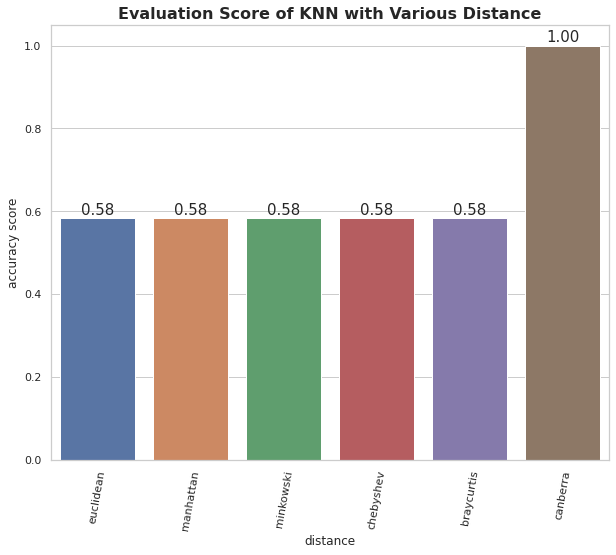

In [ ]:
bar_plot(df, 'accuracy')

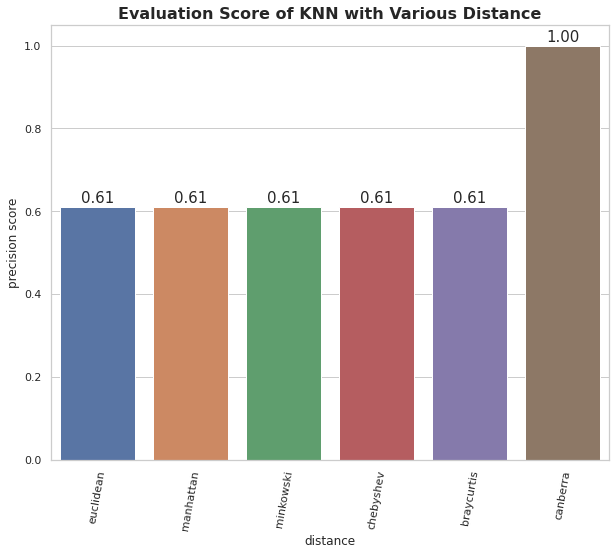

In [ ]:
bar_plot(df, 'precision')

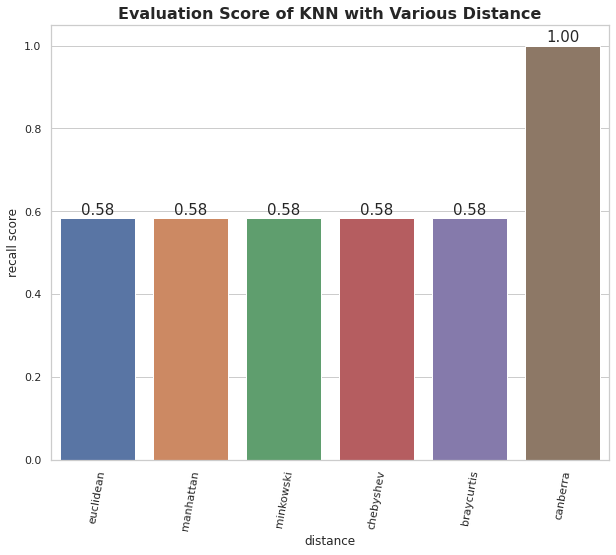

In [ ]:
bar_plot(df, 'recall')

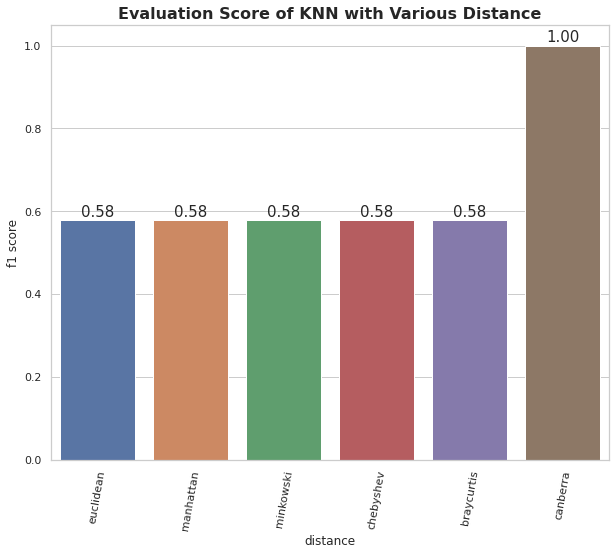

In [ ]:
bar_plot(df, 'f1')

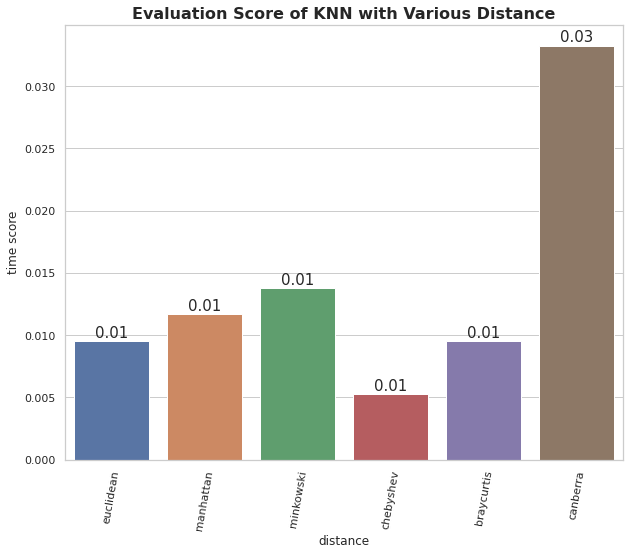

In [ ]:
bar_plot(df, 'time')

#Conclusion

Dari dataset fruit diperoleh nilai accuracy, precision, recall, f1 score yang tertinggi pada model KNN yaitu pada jarak canberra, sehingga jarak canberra pada kasus ini tergolong lebih baik daripada lima jarak lainnya. Tetapi, jarak canberra memiliki kelemahan pada nilai time score. Untuk nilai time score yang tertinggi pada model KNN yaitu pada jarak chebyshev.